# Corporate Credit Ratings
#### Background and Problem

A corporate credit rating is an opinion of an independent agency regarding the likelihood that a corporation will fully meet its financial obligations as they come due (fulfilling debt repayments on time). A company’s corporate credit rating indicates its relative ability to pay its creditors. The main agencies providing these ratings are Moody's, Fitch Ratings and Standard & Poors.
(https://www.investopedia.com/terms/c/corporate-credit-rating.asp)

This rating can affect a company's access and cost of borrowing. A bond is a fixed-income debt instrument that a corporation/government issues to investors to raise capital. Buying a bond is equivalent to loaning money to the corporation - the bond issuer. The issuer commits to repay the money at a later date. A lower rating suggests that a corporation may not meet this commitment and presents a higher risk of default on a bond (CCC and below). 

Typically a company is given a credit rating of AAA, AA, A, BBB, etc. with AAA-BB being considered investment grade with B and below are considered junk.

This prediction aims to solve the problem of evaluating and predicting the financial health and creditworthiness of companies. This is essential for companies, individual investors, financial institutions and all stakeholders who must assess the risk of lending to/investing in a company. It could also assist credit rating agencies by automating processes. Below are 3 key areas addressed by the model.

* *Risk Assessment* - Helps lenders and investors make more informed decisions about extending credit or making investments.

* *Automating Credit Evaluation* - Credit rating assessments require extensive financial analysis so a prediction model can automate part of this process

* *Portfolio Management* - Help to inform portfolio managers, to mitigate risk across their portfolio of holdings, so that they can adjust based on credit ratings.

# Binary class classification

| Credit Rating | Risk Level | Grade |
| -------- | ------- | ------- |
| AAA  |   Lowest Risk | Investment |
| AA   |   Low Risk | Investment |
| A    |   Low Risk | Investment |
| BBB  |   Medium Risk | Investment |
| BB   |   High Risk | Junk |
| B   |   High Risk | Junk |
| CCC/CC/C  |   Highest Risk | Junk |
| D    |   In Default | Junk |

#### The Problem Statement

* Objective: Evaluate and predict the credit worthiness of institutions, classifying them into  into predefined credit rating categories based on financial indicators

* Output: Multi-class classification (e.g., Low, Medium, High Risk) or binary classification (e.g. Investment Grade/Junk)

        I have opted to use binary classification, as it is recognised in industry, and will produce better results when considering prediction model metrics

* Description: Use financial indicators such as cashflow and profitability data to classify institutions into classes that determine their risk level to inform stakeholders involved in investment, borrowing and lending.

* Possible Algorithms: K Nearest Neighbours, Support Vector Machines


        I have opted to use both K Nearest Neighbours for its compatibility with iregular decision boundaries.

* Business Use Cases: 

        Risk Assessment - improving access to credit worthiness data for investors and lenders,
        Automation of Credit Evaluation - assisting rating agencies on assigning risk levels to different companies
        Portfolio Management - Assisting in mitigating risk in investment management



## Data Collection


In [47]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors


In [48]:
# PREREQUISITE to pip install kagglehub

import kagglehub
kagglehub.dataset_download("agewerc/corporate-credit-rating")

'C:\\Users\\unamo\\.cache\\kagglehub\\datasets\\agewerc\\corporate-credit-rating\\versions\\1'

### About the Dataset

This data was sourced from [financemodelingprep](https://site.financialmodelingprep.com/) and [opendatasoft](https://public.opendatasoft.com/explore/?sort=modified). These were combined such that the rating was sourced by open datasoft and the financial information by financialmodeling prep.

The dataset was put together and cleaned by [Alan Gwerc](https://github.com/Agewerc/ML-Finance/tree/master). The script to generate the dataset included a standardisation of ratings, as some rating agencies use AAA, AA+, AA, AA- etc. This has no effect on the validity of the prediction as the additional categories still map to a binary classification: Investment grade or Junk grade. Duplicates in the data set were also dropped.

In [49]:
# Your file will be downloaded and saved to your local cache, add the specified file path detailed above, if downloading the dataset through kagglehub
#df = pd.read_csv('filepath\corporate_rating.csv')
df = pd.read_csv('corporate_rating.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

### Guide to the Data Features


There are 30 features for every company of which 25 are financial indicators. They can be divided into 4 categories:


**Liquidity Measurement Ratios**: currentRatio, quickRatio, cashRatio, daysOfSalesOutstanding


    currentRatio: Current ratio is a liquidity measure indicating a company's ability to cover its short-term obligations with its current assets.

    quickRatio: Quick ratio, also known as the acid-test ratio, measures a company's short-term liquidity by comparing its most liquid assets to its current liabilities.

    cashRatio: Cash ratio measures the extent to which a company can pay off short-term liabilities with cash and cash equivalents alone.

    daysOfSalesOutstanding: Days of Sales Outstanding (DSO) shows the average number of days it takes a company to collect payment after a sale.



**Profitability Indicator Ratios**: grossProfitMargin, operatingProfitMargin, pretaxProfitMargin, netProfitMargin, effectiveTaxRate, returnOnAssets, returnOnEquity, returnOnCapitalEmployed, companyEquityMultiplier

    grossProfitMargin: Gross profit margin is the percentage of revenue that remains after deducting the cost of goods sold, indicating the efficiency of production.

    operatingProfitMargin: Operating profit margin measures the percentage of revenue remaining after covering operating expenses, indicating operational efficiency.

    pretaxProfitMargin: Pretax profit margin is the percentage of revenue that remains after all operating expenses and interest have been subtracted but before taxes.

    netProfitMargin: Net profit margin represents the percentage of revenue left as profit after all expenses have been deducted.

    effectiveTaxRate: Effective tax rate represents the average rate a company pays on its earned income.

    returnOnAssets: Return on Assets (ROA) shows how efficiently a company uses its assets to generate profit.

    returnOnEquity: Return on Equity (ROE) indicates how efficiently a company generates profit using shareholders' equity.

    returnOnCapitalEmployed: Return on Capital Employed (ROCE) measures a company's profitability and efficiency in using its capital.

    companyEquityMultiplier: Equity multiplier measures a company's leverage by showing the ratio of total assets to shareholders' equity.



**Debt Ratios**: debtRatio, debtEquityRatio

    debtRatio: Debt ratio shows the proportion of a company's assets financed by debt.

    debtEquityRatio: Debt-to-equity ratio compares a company's total debt to its shareholders' equity, indicating its financial leverage.



**Operating Performance Ratios**:` assetTurnover, payablesTurnover, enterpriseValueMultiple, ebitPerRevenue

    assetTurnover: Asset turnover ratio shows how efficiently a company uses its assets to generate sales.

    payablesTurnover: Payables turnover ratio indicates how quickly a company pays off its suppliers and other short-term debts.

    enterpriseValueMultiple: Enterprise value multiple is a valuation metric that compares enterprise value to earnings before interest, taxes, depreciation, and amortization (EBITDA).

    ebitPerRevenue: EBIT per revenue (Operating income margin) shows the percentage of revenue left after covering operating costs, before interest and taxes.



**Cash Flow Indicator Ratios**: operatingCashFlowPerShare, freeCashFlowPerShare, cashPerShare, operatingCashFlowSalesRatio, freeCashFlowOperatingCashFlowRatio

    operatingCashFlowPerShare: Operating cash flow per share measures the cash generated by operations on a per-share basis.

    freeCashFlowPerShare: Free cash flow per share indicates how much free cash flow is available on a per-share basis.

    cashPerShare: Cash per share shows the amount of cash available per outstanding share.

    operatingCashFlowSalesRatio: This ratio compares operating cash flow to sales, showing the percentage of revenue converted into cash flow from operations.

    freeCashFlowOperatingCashFlowRatio: This ratio compares free cash flow to operating cash flow, indicating the portion of cash flow available for reinvestment.



## Data Preparation and Feature Engineering
Prepare the data for training, such as cleaning and transforming it. This may involve removing outliers, imputing missing values, and normalizing the data. Select the features that are most important for the problem. This may involve creating new features or removing irrelevant features.

* Non numerical data


Our non numeric columns are company name, company symbol, rating agency name, date and sector.

I explored the option of One-Hot encoding, splitting each sector into a binary column of its own. Although sector could impact the risk level of a company, I decided to drop the column altogether as sector is unlikely to have a major impact on credit worthiness. Financials are significantly more relevant indicators used by Rating Agencies in industry.

Date has been dropped from the final features too. Although a company evaluated at different periods could be considered a Time Series, the rating agencies base decisions on financial indicators, so previous ratings should not be factored in to eliminate bias.

(see *Limitations section below*)

* Miscellaneous categories

A further reason to drop the Sector column was the Miscellaneous sector category. During the cleaning stage, these were categories with low numbers aggregated into one. This data could be misleading in comparison to other sectors, with potential characteristics that are not shared, so is better dropped.


* Irrelevant columns

Company name has direct correlation to symbol, and I opted to drop both of these columns to eliminate bias in the dataset, as our target should not be dependent on the company name to avoid overfitting. 
Rating Agency is also dropped from final features as the ratings have already been standardised with duplicates removed in the data cleaning stage (see *About the Dataset section above*).

In [50]:
df.head(7)

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
5,AA,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,7/18/2014,Energy,1.741958,1.317156,0.220796,83.931968,...,0.252389,0.644841,5.574517,5.792278,1.767609,0.157246,9.833295,8.644788,0.230445,4.044776
6,AA,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,5/13/2014,Energy,1.939002,1.468909,0.256710,92.705452,...,0.270057,0.597160,4.417989,6.326531,1.700068,0.151173,12.140376,7.398337,0.216233,3.998076


In [51]:
df_grade = df.drop(['Name', 'Symbol', 'Date', 'Rating Agency Name', 'Sector'], axis=1)
df_grade.head()

,Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


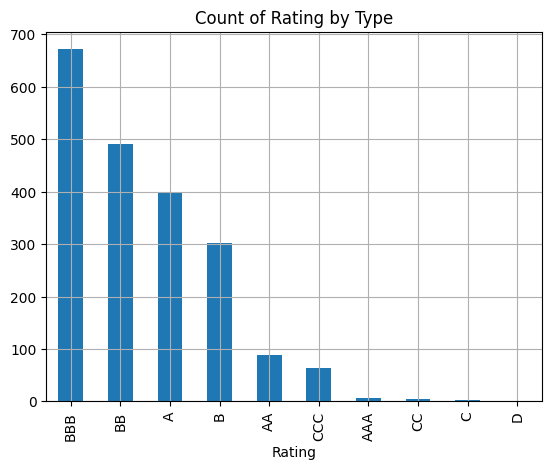

In [52]:
original_rating_count = df['Rating'].value_counts().plot(kind='bar', title="Count of Rating by Type", grid=True)

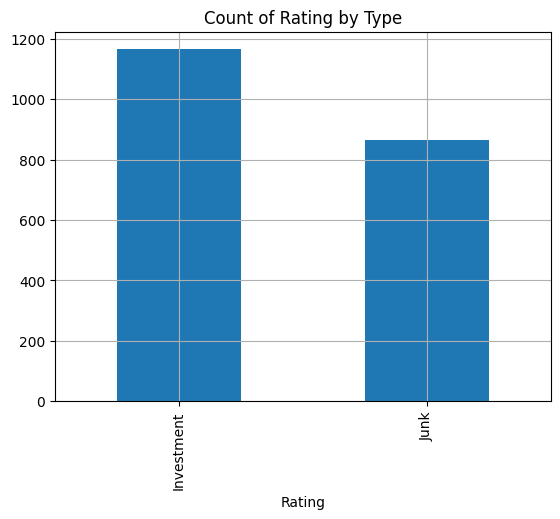

In [53]:
# Maps the specific grade into binary classes, Junk grade and Investment grade
grade_dictionary = {'AAA':'Investment', 
        'AA':'Investment',
        'A':'Investment',
        'BBB':'Investment', 
        'BB':'Junk',
        'B':'Junk',
        'CCC':'Junk', 
        'CC':'Junk',
        'C':'Junk',
        'D':'Junk'}

df_grade.Rating = df.Rating.map(grade_dictionary)
binary_rating_count = df_grade['Rating'].value_counts().plot(kind='bar', title="Count of Rating by Type",grid=True)

To make compatible with our models, we will translate these to integer values,
0 being Junk grade, 1 being Investment grade

["Junk", "Investment"]

In [54]:
grade_dictionary_numeric = {'Junk': 0, 'Investment': 1}
df_grade.Rating = df_grade.Rating.map(grade_dictionary_numeric)
df_grade.head()

,Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,1,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,1,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,1,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,1,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


A correlation matrix has been used to show the relationship between the variables, helping to identify pairs of features that are strongly related (positively or negatively). This information can guide feature selection and reduce redundancy.

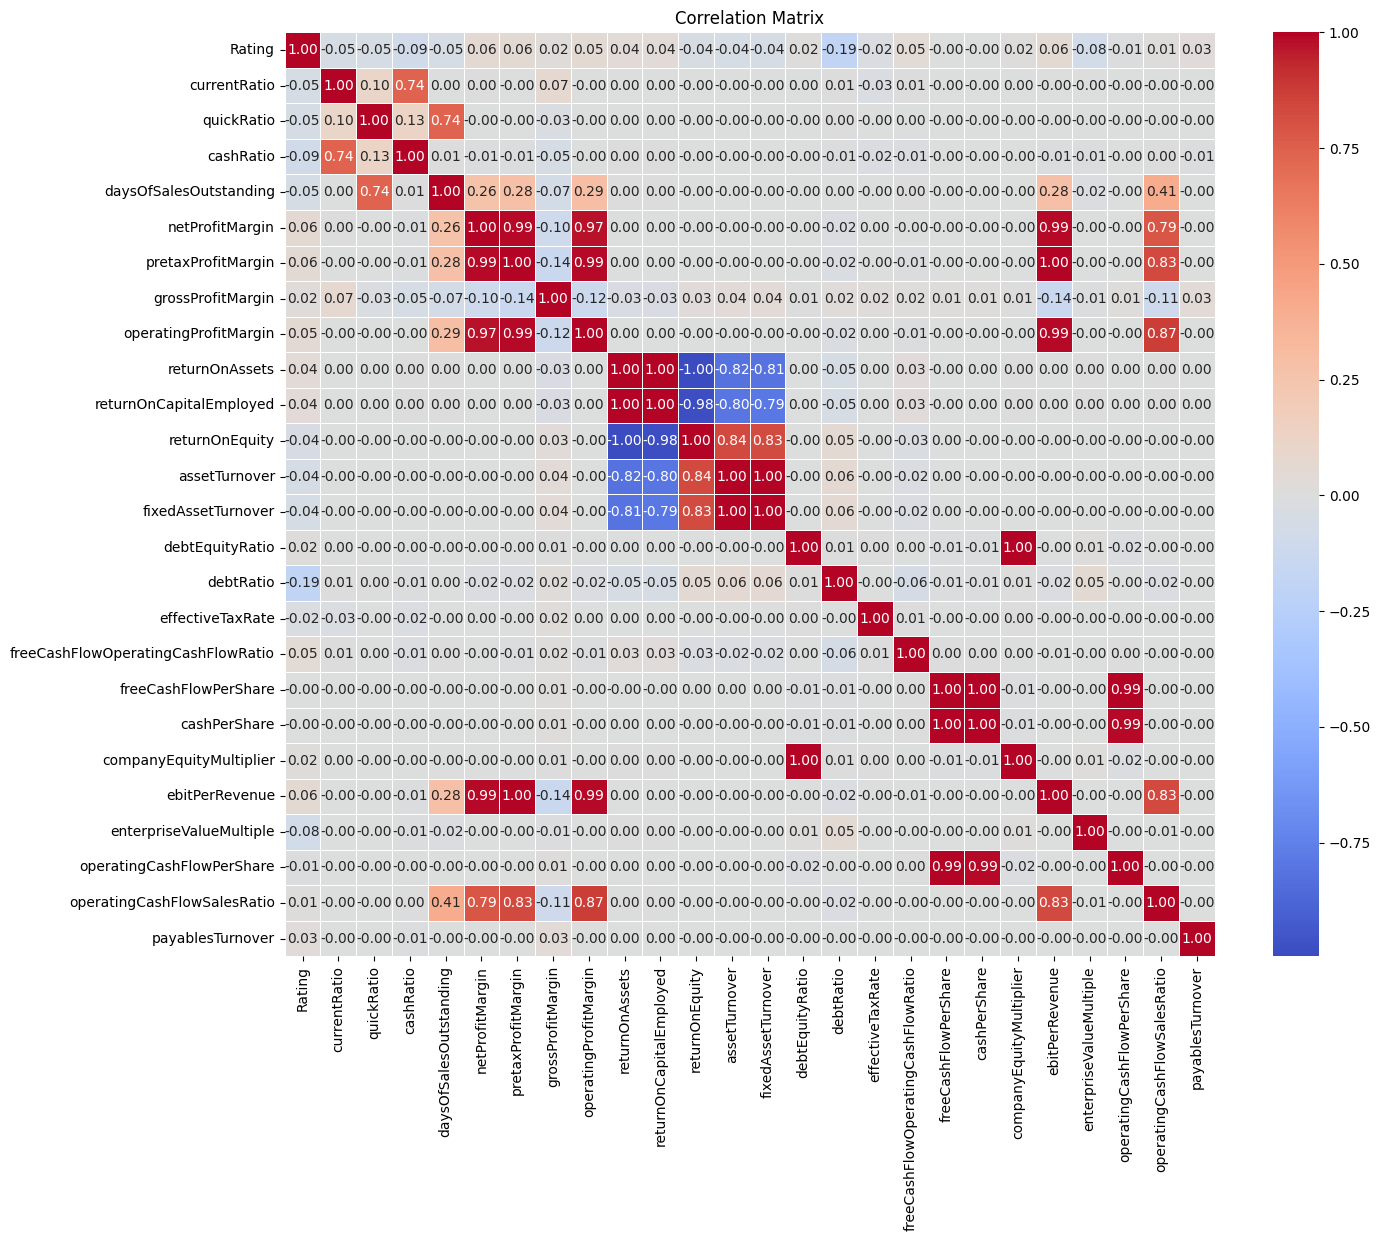

In [55]:
correlation_matrix = df_grade.corr()

# Display the correlation matrix as a heatmap for better visualization, cmap being cool warm, blue for strong negative correlation, red for strong positive and grey for no correlation
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#### Key Takeaways from the Correlation Matrix

1. Some pairs of features are highly correlated such as
    * returnOnAssets and returnOnCapitalEmployed (1.00)
    * ebitPerRevenue and pretaxProfitMargin (1.00)
    * grossProfitMargin and operatingProfitMargin (0.99)

    This suggests potential redundancy, where dimensions could be reduced to fewer columns without significant information loss. These features are nearly identical because they capture similar aspects of a company's profitability/efficiency.

2. The vast majority pairs have very low/neglible correlation, especially with Rating, the  target

    This suggests that a combination of features is necessary to achieve a meaningful predictive model rather than relying on fewer highly correlated features. It also indicated that more sophisticated models that capture non linear relationships may be required.

3. There are pairs with high negative correlation
    * returnOnAssets and returnOnEquity (-1.00)
    * assetTurnover and returnOnAssets (-0.82)

    These metrics pairs are both strongly inversely related

## Model Training and Evaluation

In [56]:
targets = df_grade["Rating"]
final_features = df_grade.drop("Rating", axis=1)

final_features.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.397572,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,10.595075,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.146854,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.300539,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.370653,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(final_features,targets,random_state=2)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape
# 75 / 25 split

((1521, 25), (508, 25), (1521,), (508,))

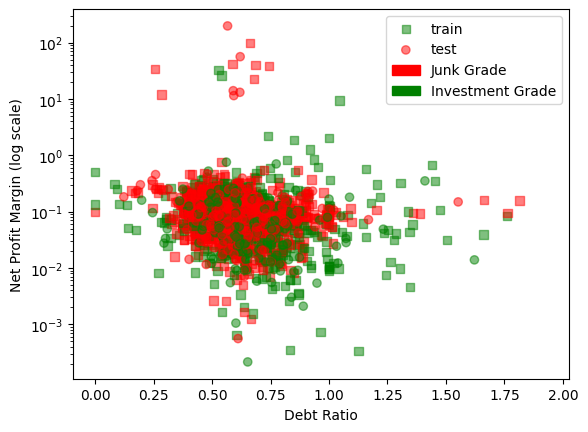

In [58]:
cmap = colors.ListedColormap(["green", "red"])
# Plots debtRatio and netProfitMargin for both training and test data
plt.scatter( xtrain['debtRatio'], xtrain['netProfitMargin'] , c= ytrain, cmap=cmap, alpha = 0.5, label = 'train', marker='s')
plt.scatter( xtest['debtRatio'], xtest['netProfitMargin'] , c= ytest, cmap=cmap, alpha = 0.5, label = 'test', marker='o')

rpatch = mpatches.Patch(color='red', label='Junk Grade')
gpatch = mpatches.Patch(color='green', label='Investment Grade')

plt.xlabel("Debt Ratio")
plt.ylabel("Net Profit Margin (log scale)")

plt.yscale('log')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
handles.extend([rpatch, gpatch])
plt.legend(handles=handles)
plt.show()

Graph showing Debt Ratio plotted against Net Profit Margin.


    debtRatio: Debt ratio shows the proportion of a company's assets financed by debt.

    netProfitMargin: Net profit margin represents the percentage of revenue left as profit after all expenses have been deducted.

There is no obvious decision boundary between Junk and Investment Grade, however Junk Grade tends to be concentrated in the centre of the main cluster, with a smaller cluster at the top with a high net profit margin and debt ratio.

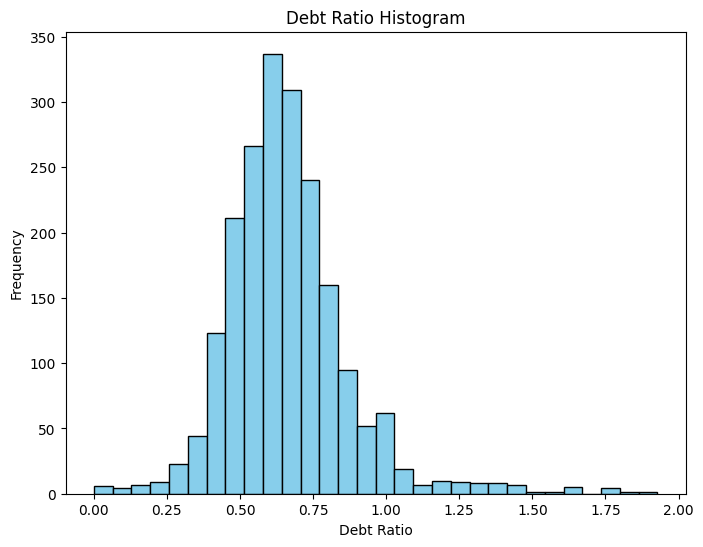

In [59]:
# Histogram for the debtRatio column 
plt.figure(figsize=(8, 6))
plt.hist(final_features["debtRatio"], bins=30, color='skyblue', edgecolor='black')
plt.title("Debt Ratio Histogram")
plt.xlabel("Debt Ratio")
plt.ylabel("Frequency")
plt.show()

The scatter plot and histogram above suggest debtRatio follows a normal distribution with a positive skew.

In [60]:
# Function to calculate the accuracy, precision, recall and f1 score for the prediction models
def model_metrics(ytrain, ytrainpred, ytest, ytestpred):
    
    train_accuracy  = accuracy_score(ytrain, ytrainpred)
    train_precision =  precision_score(ytrain, ytrainpred)
    train_recall =  recall_score(ytrain, ytrainpred)
    train_f1 =  f1_score(ytrain, ytrainpred)

    test_accuracy  = accuracy_score(ytest, ytestpred)
    test_precision =  precision_score(ytest, ytestpred)
    test_recall =  recall_score(ytest, ytestpred)
    test_f1 =  f1_score(ytest, ytestpred)

    print("The accuracy of the train set is {:.3f}".format(train_accuracy))
    print("The precision of the train set is {:.3f}".format(train_precision))
    print("The recall of the train set is {:.3f}".format(train_recall))
    print("The f1 score of the train set is {:.3f}".format(train_f1))
    print("")
    print("The accuracy of the test set is {:.3f}".format(test_accuracy))
    print("The precision of the test set is {:.3f}".format(test_precision))
    print("The recall of the test set is {:.3f}".format(test_recall))
    print("The f1 score of the test set is {:.3f}".format(test_f1))

In [61]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain,ytrain)

ytestpred = model.predict(xtest)
ytrainpred = model.predict(xtrain)

model_metrics(ytrain, ytrainpred, ytest, ytestpred)

The accuracy of the train set is 0.845
The precision of the train set is 0.833
The recall of the train set is 0.916
The f1 score of the train set is 0.872

The accuracy of the test set is 0.713
The precision of the test set is 0.718
The recall of the test set is 0.812
The f1 score of the test set is 0.762


Looking at the metrics, we see a weaker performance in the new, unseen data. The model's accuracy drops from 84.5% in the training set to 71.3% in the test set.
This discrepancy suggests a possible **overfitting** of the model. 

We see a similar drop in precision and recall, which is consistent with a decline in the aggregate f1 score that represents both of these.

A lower test precision could imply that the model is making more false positives on unseen data than it did in training.

A lower test recall indicates the model may be missing some positive cases (Investment grade) in the test set compared to the training set.

Number of True Negatives: 128.000
Number of True Positives: 234.000
Number of False Negatives: 54.000
Number of False Positives: 92.000


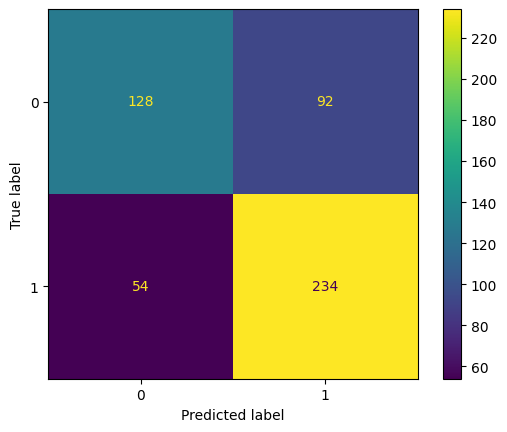

In [62]:
cm = metrics.confusion_matrix(ytest,ytestpred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
print("Number of True Negatives: {:.3f}".format(cm[0,0]))
print("Number of True Positives: {:.3f}".format(cm[1,1]))
print("Number of False Negatives: {:.3f}".format(cm[1,0]))
print("Number of False Positives: {:.3f}".format(cm[0,1]))

#### ROC Curve (k=3)

The Receiver Operating Characteristic is the proportion of correct identifications as a function of the proportion of false positives.

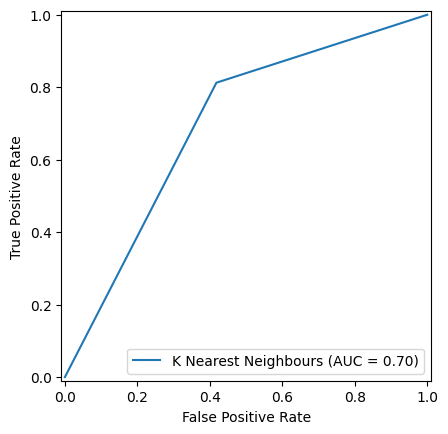

In [63]:
fpr, tpr, thresholds = roc_curve(ytest, ytestpred)
roc_auc = metrics.auc(fpr, tpr)
disp = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='K Nearest Neighbours')
disp.plot()
plt.show()

The best place to operate on this ROC curve is where the model achieves a balance of high True Positive Rate with a low False Positive Rate.
Thinking about the optimum, perfect classifier, the best point to operate in terms of minimising the Euclidean distance would be approximately a tpr of 0.8 and a false positive rate of 0.4.

The area under the curve is 0.70 which we use to compare post hyperparameter tuning (see below).

## Limitations

#### Date and company excluded from the model

Date and company were dropped from final features. This is a potential limitation as the model may miss out on temporal trends, as economic cycles and company specific changes can influence risk profiles. The previous ratings could be used as an anchor and financial indicators may be insufficient in reflecting this. 

#### Possible Overfitting

The metrics suggest possible overfitting. To address this, there are several approaches to take. I will make use of the following

* **Cross Validation**

Splitting data into multiple train/test splits and repeating the process. The overall performance can be estimated as the average of the test scores in all the attempts.

I will make use of K fold validation, specifically StratifiedKFold such that in each fold, the ratio of Investment grade to Junk Grade remains the same.

* **Hyper Parameter Tuning**

The choice of K in K Nearest Neighbours has a direct impact on the model's generalisation. Increasing k could help the model become less overfitted, but increasing k too much faces a risk of underfitting. I make use GridSearchCV to find an optimal k, based on accuracy.

In [64]:
# Cross vallidation using stratified K fold to replicate the ratio of Junk grade to Investment grade
cv = StratifiedKFold(shuffle = True, n_splits = 5, random_state=5)
scores = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv, scoring = 'accuracy')

print("Accuracy test score: {:.2} +/- {:.2}".format(scores['test_score'].mean(), scores['test_score'].std()))

Accuracy test score: 0.73 +/- 0.024


The above shows a better estimate of our model performance, KNN with 3 neighbours has an average accuracy score of 0.72 with a standard deviation of 0.024.

The next step is to tune the k hyperparameter to find the optimum value. This has been determined to be 7.

In [65]:
# Define a parameter grid, starting from 3 to 21 with a step of 2 (odd numbers)
param_grid = {'n_neighbors': range(3, 21, 2)}
# The optimal k is chosen based on accuract score
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(final_features, targets)
print("Best k:", grid_search.best_params_)

results_df = pd.DataFrame(grid_search.cv_results_)[['param_n_neighbors', 'mean_test_score', 'std_test_score']]
results_df.columns = ['k (n_neighbors)', 'Mean Test Accuracy', 'Std Test Accuracy']
print(results_df)

Best k: {'n_neighbors': 7}
  k (n_neighbors)  Mean Test Accuracy  Std Test Accuracy
0               3            0.596833           0.016349
1               5            0.621967           0.027970
2               7            0.625419           0.028172
3               9            0.620984           0.030092
4              11            0.615067           0.032241
5              13            0.616065           0.030163
6              15            0.610648           0.035189
7              17            0.620019           0.036715
8              19            0.617555           0.034535


In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(final_features,targets,random_state=5)

model1 = KNeighborsClassifier(n_neighbors=7)
model1.fit(xtrain,ytrain)

ytestpred = model1.predict(xtest)
ytrainpred = model1.predict(xtrain)

model_metrics(ytrain, ytrainpred, ytest, ytestpred)

The accuracy of the train set is 0.773
The precision of the train set is 0.761
The recall of the train set is 0.879
The f1 score of the train set is 0.816

The accuracy of the test set is 0.738
The precision of the test set is 0.725
The recall of the test set is 0.885
The f1 score of the test set is 0.797


With k=7, we see a decline in metric scores for the train set. Training accuracy, precision, and F1 score decreased slightly as compared to k=3, suggesting a successful reduction of overfitting.


We also see an increase in accuracy (+0.025) for the test set. There is also an increase in test recall implying more positive test cases have been identified correctly and higher precision, as a higher percentage of those predicted positive were correct.


The train set and test set are now more closely aligned, suggesting better performance for unseen data.


| Prediction metric | k = 3 | k = 7 |
|--|--|--|
| Train accuracy |0.845|0.773|
| Train precision |0.833|0.761|
| Train recall |0.916|0.879|
| Train f1 score |0.872|0.816|
|  |||
| Test accuracy |0.713|0.738|
| Test precision |0.718|0.725|
| Test recall |0.812|0.885|
| Test f1 score |0.762|0.797|


Number of True Negatives: 114.000
Number of True Positives: 261.000
Number of False Negatives: 34.000
Number of False Positives: 99.000


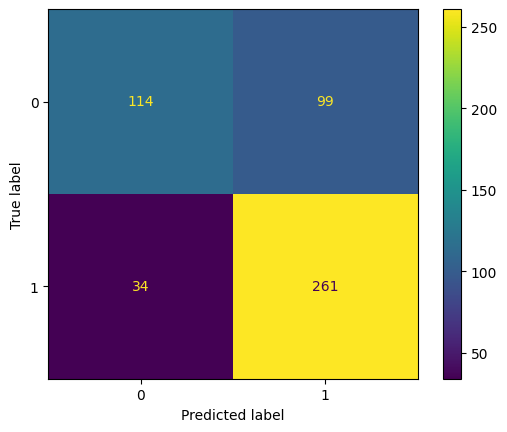

In [67]:
cm = metrics.confusion_matrix(ytest,ytestpred, labels=model1.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot()
print("Number of True Negatives: {:.3f}".format(cm[0,0]))
print("Number of True Positives: {:.3f}".format(cm[1,1]))
print("Number of False Negatives: {:.3f}".format(cm[1,0]))
print("Number of False Positives: {:.3f}".format(cm[0,1]))

#### ROC Curve (k=7)

The Receiver Operating Characteristic is the proportion of correct identifications as a function of the proportion of false positives.

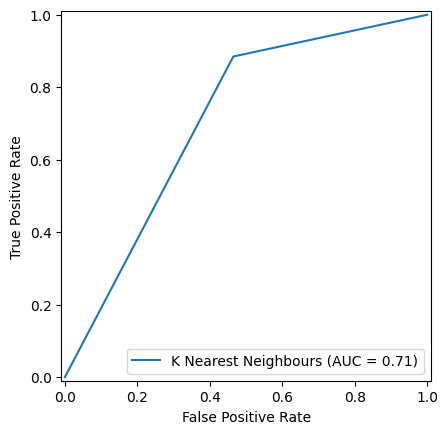

In [68]:
# fpr false positive rate, tpr true positive rates. 
fpr, tpr, thresholds = roc_curve(ytest, ytestpred)
roc_auc = metrics.auc(fpr, tpr)
disp = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='K Nearest Neighbours')
disp.plot()
plt.show()

The area under the curve has increased from 0.7 to 0.71. The new optimal place to operate on this ROC curve in terms of minimising the Euclidean distance would be approximately a tpr of 0.9 and a false positive rate of 0.42. 

### Use of AI Assistants


*Feature Information*

I made use of ChatGPT to generate descriptions of the features. Through my workplace, I am familiar with the terminology, but would struggle to write technical yet concise descriptions. I applied an AI assistant to provide more meaningful context. I then arranged the descriptions into their appropriate categoriews (Liquidity indicators, profitability indicators etc.)

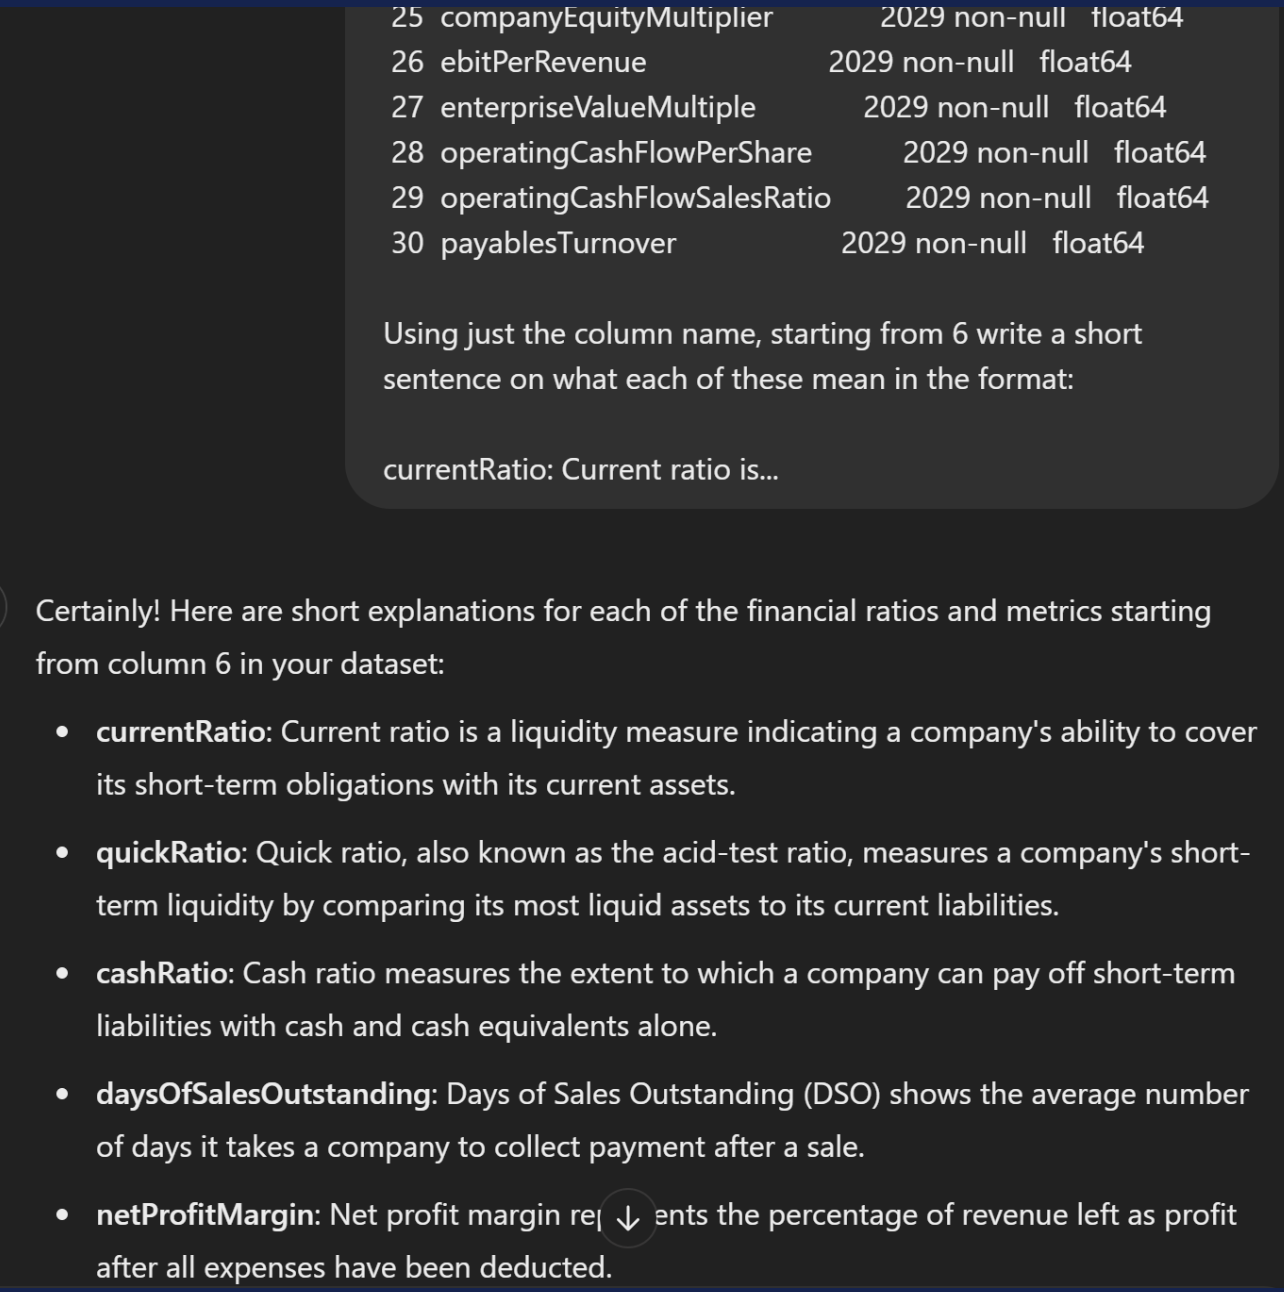

*Correlation Matrix*

I made use of ChatGPT to generate the code needed for my correlation matrix. It makes use of a library called seaborn and suggested 

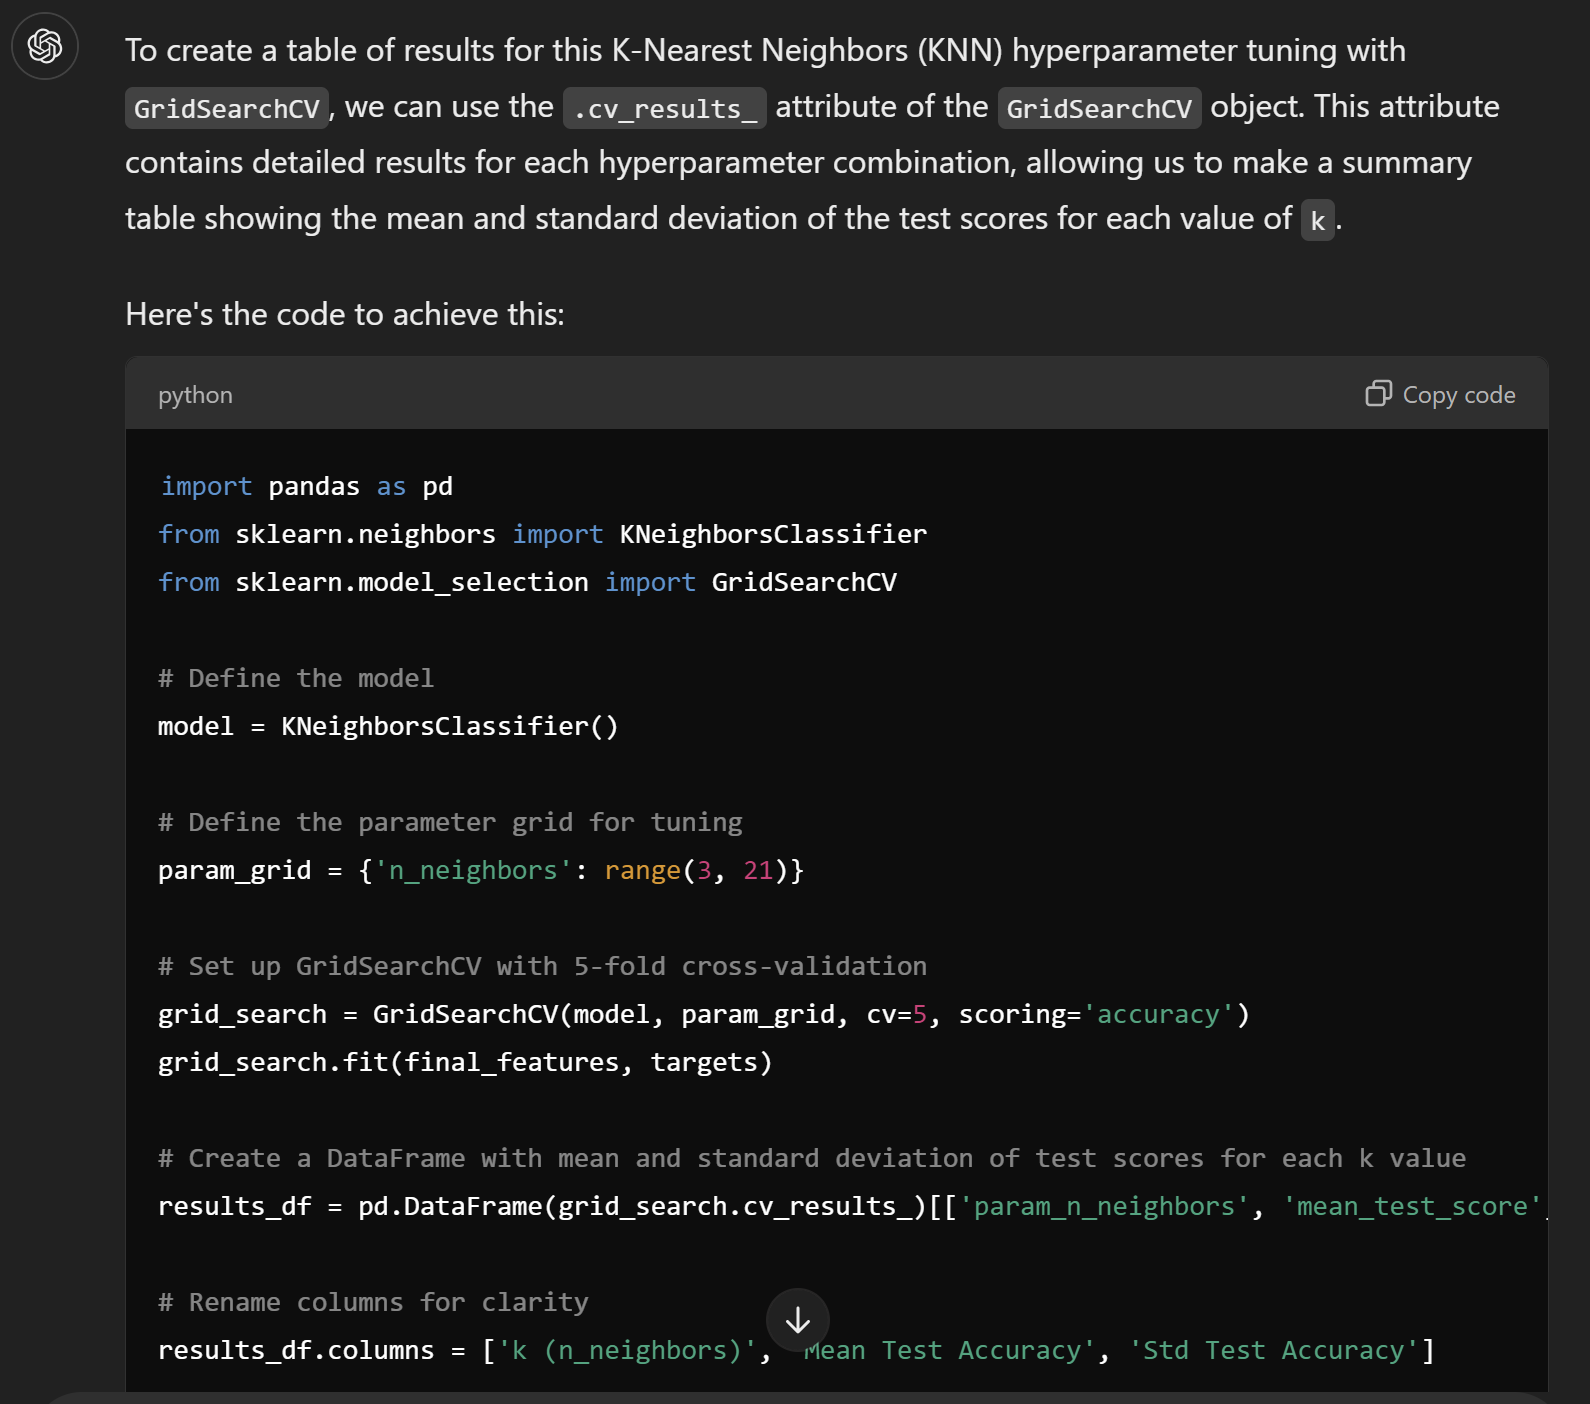


*Hyperparameter Tuning*

I made use of ChatGPT to assist in generating the table to tune the hyperparameters. I wanted it to be in table form to see the metrics of different values of k. I tweaked the code to show only odd values of k, to eliminate the possibility of a split vote. 

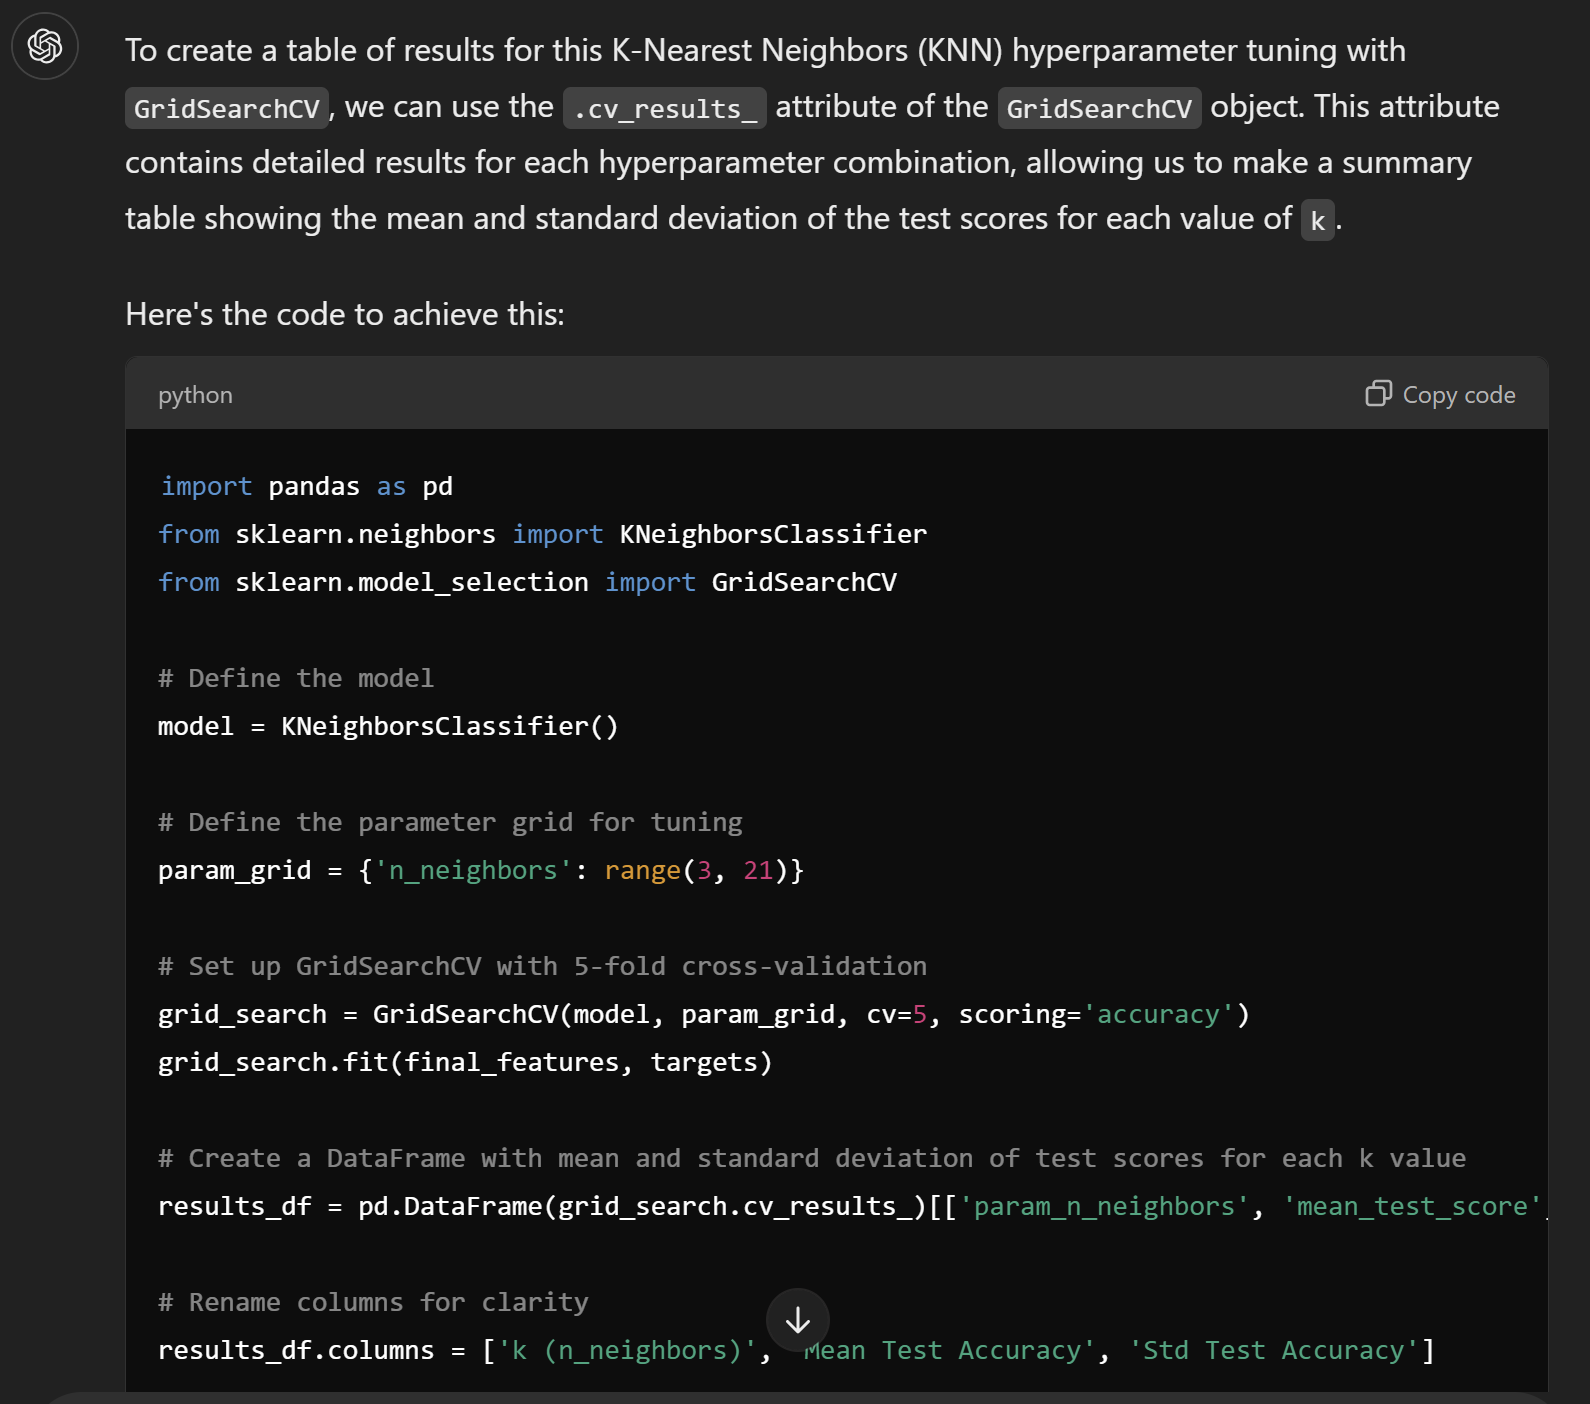



#### Model Limitations

*Referring back to our objectives and key business use cases above*

* Objective: Evaluate and predict the credit worthiness of institutions, classifying them into into predefined credit rating categories based on financial indicators

* Business Use Cases: 

        Risk Assessment - improving access to credit worthiness data for investors and lenders,
        Automation of Credit Evaluation - assisting rating agencies on assigning risk levels to different companies
        Portfolio Management - Assisting in mitigating risk in investment management


----------------------------------------------------------------------

* Feature selection

Some features, such as Sector and Date (of the rating) that were dropped from the dataframe that were deemed irrelevant. Some sectors could have more market volatility than others, affecting credit worthiness. Rather than assumptions made by myself, it would be better to do feature importance analysis to see what the most important are.


* External factors influencing credit ratings

Other external factos such as macroeconomic factors can impact the risk level of a company. With the objective of automating the processes taken by rating agencies that can also also rate more harshly due to changing regulation, suggests that the model could contain more data beyond just the companies financial indicators.


* K Nearest Neighbours Limitations

KNN can be vulnerable to outliers, since any nearby points define the prediction for the unseen data. This could lead to overfitting.


* Assumptions

By dropping the rating agency column, it has been assumed that rating agencies are comparatively unbiased, with no agency being "harsher" than another, therefore having no effect on the credit rating. This may not be true, and perhaps sentiments differ across the agencies.


#### Conclusion

The K Nearest Neighbours model has addressed the objective, with a satisfactory accuracy and f1 score (harmonic mean of precision and recall) for th4e unseen test data, 0.738 and 0.797 respectively. The high f1 score suggests the model strikes a good balance of precision and recall and is not overfitted. There is room for improvement for the metrics to be considered good, so the model as it stands does address the objjective but would not fully support automation.

Further work could include fitting a support vector machine model. SVMs work well with datasets with many features (high dimensional datasets). Both linear and non linear partitions could be explored to implement a more robust model resulting in clear decision boundaries. Predictions could also have scores, e.g. 0.98 likely to be investment grade. These can be translated to the original AAA, AA, A etc. rating scale.